In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [4]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species'] 
df = pd.read_csv('/kaggle/input/iris-data/iris.data', names=columns)

In [5]:
df.head(11)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

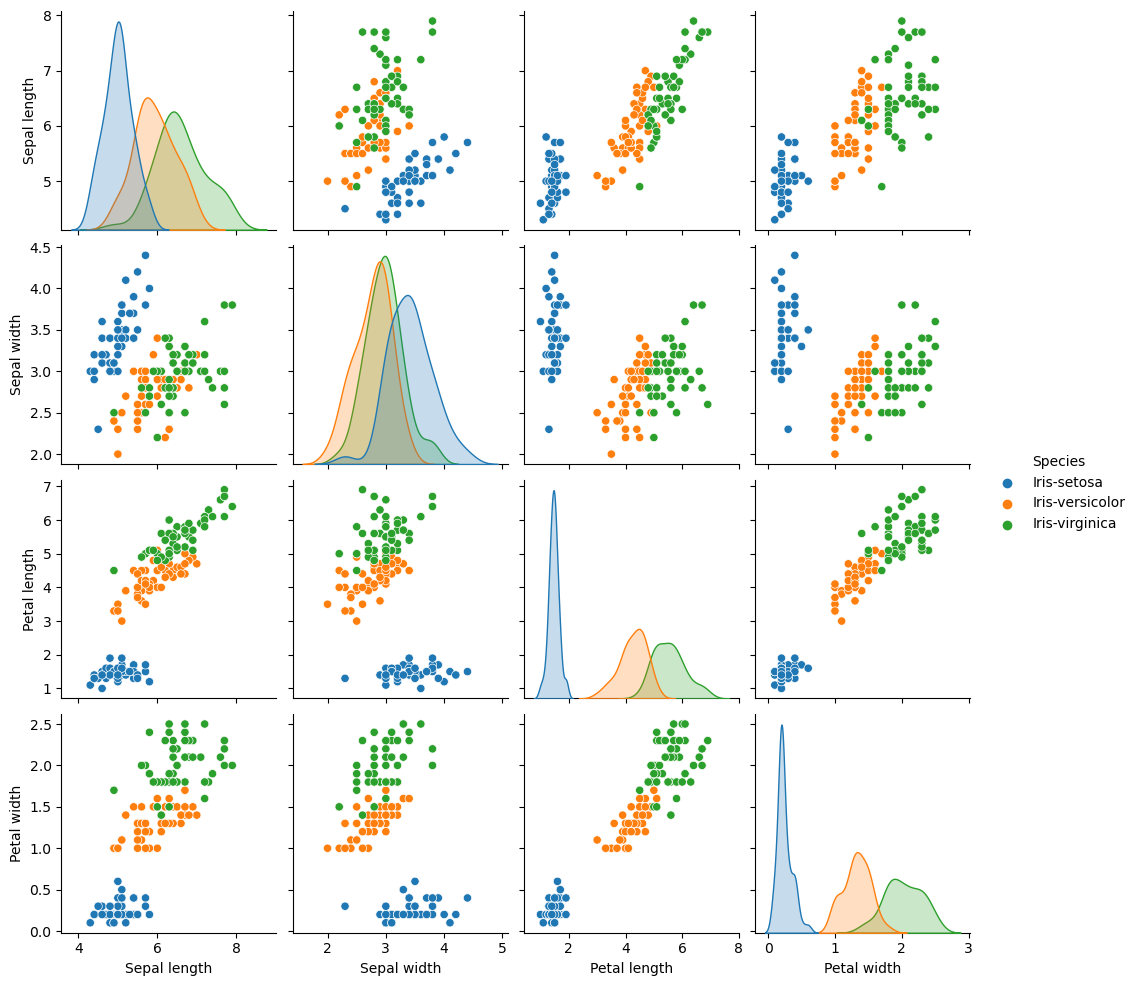

In [8]:
sns.pairplot(df, hue='Species')

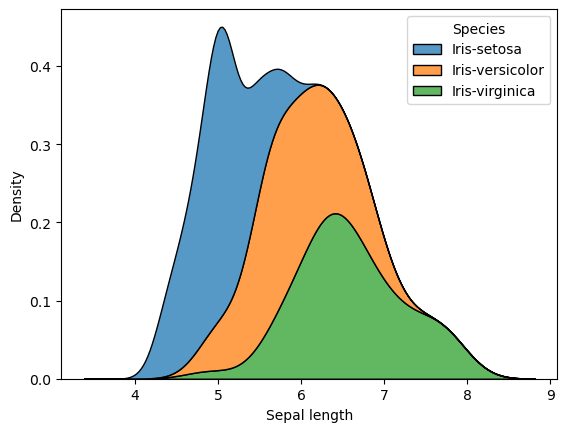

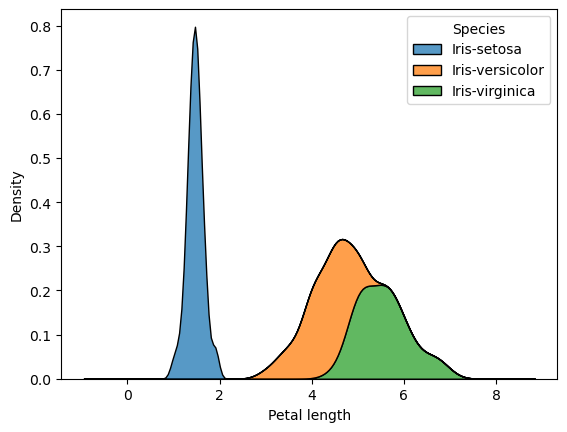

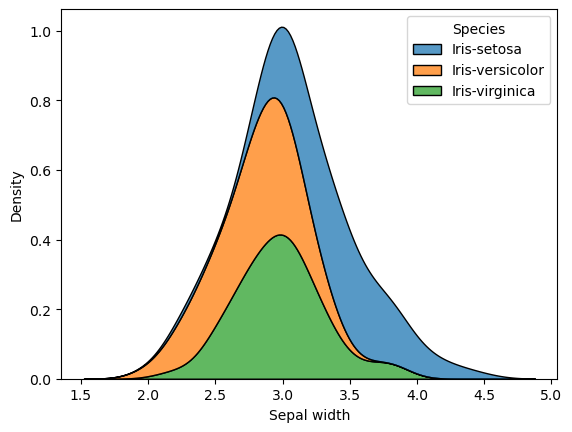

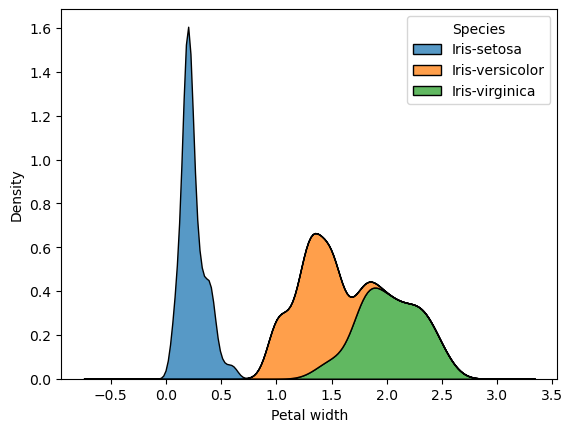

In [9]:
sns.kdeplot(data=df, x="Sepal length", hue="Species", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Petal length", hue="Species", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Sepal width", hue="Species", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Petal width", hue="Species", multiple="stack")
plt.show()

<AxesSubplot:xlabel='Sepal width', ylabel='Petal width'>

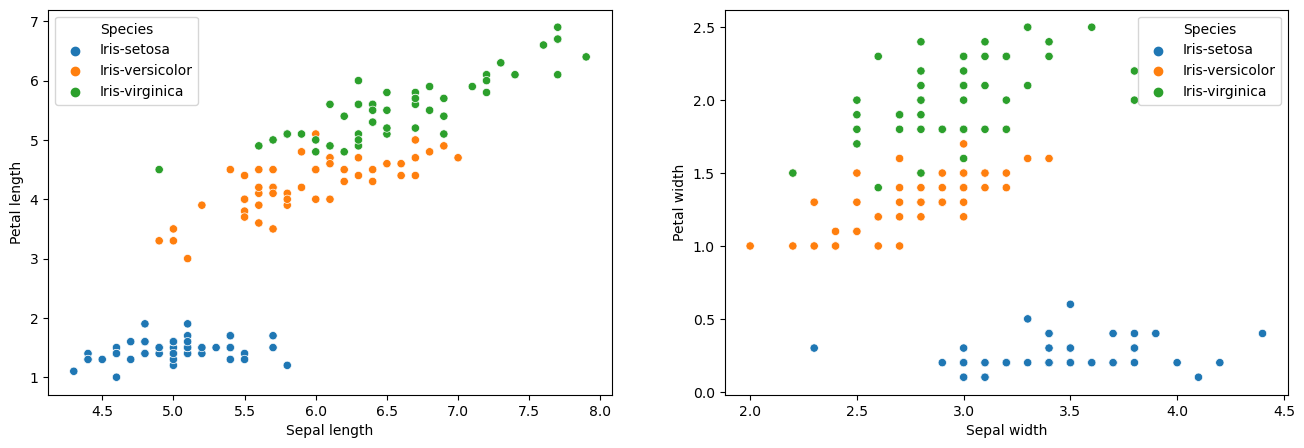

In [10]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal length',y='Petal length',data=df,hue='Species',ax=ax1)
sns.scatterplot(x='Sepal width',y='Petal width',data=df,hue='Species',ax=ax2)

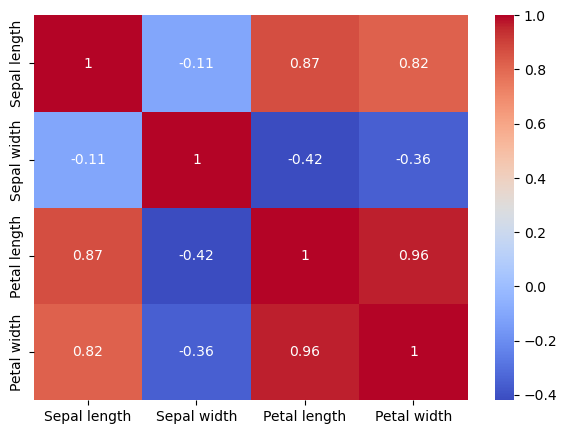

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

In [12]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [13]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

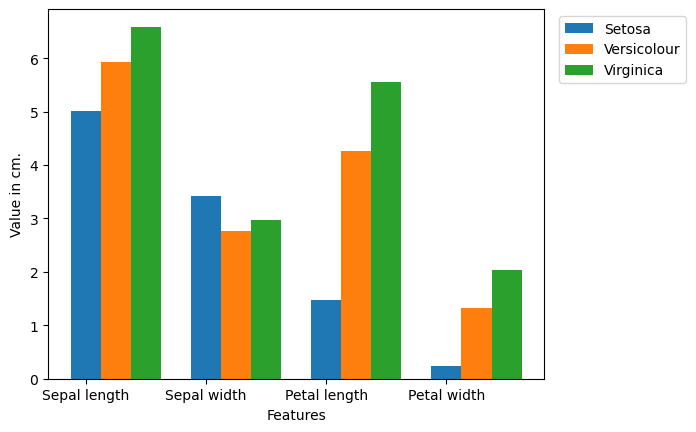

In [14]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [15]:
X = df.drop(columns=['Species'])
Y = df['Species']
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [16]:
model_1=LinearRegression()

In [17]:
model_1.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred=model_1.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [19]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

In [20]:
print('Linear Regression')
report(model_1)
print(f'Accuracy: {round(score*100,2)}%')

Linear Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


In [21]:
DTC =DecisionTreeClassifier()

In [22]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [24]:
print("Decision Tree Classifier")
report(DTC)
print(f' Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

 Accuracy: 100.0%
